In [1]:
# import necessary modules
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from numpy.fft import fft, ifft , rfft, irfft , fftfreq
from numpy import exp, log, log10, cos, sin, pi, cosh, sinh , sqrt
from classy import Class
from scipy.optimize import fsolve
from scipy.special import gamma
from scipy.special import hyp2f1
from scipy import interpolate
import sys
from time import time
from scipy.integrate import quad
import scipy.integrate as integrate
from scipy import special
from scipy.special import factorial
import math

In [2]:
############################################
z_pk = 0.61
common_settings = {# fixed LambdaCDM parameters
                   'N_eff':3.046,
                   'A_s':2.089e-9,
                   'n_s':0.9649,
                   'tau_reio':0.052,
                   'omega_b':0.02237,
                   'omega_cdm':0.12,
                   'h':0.6736,
                   'YHe':0.2425,
                   # other output and precision parameters
#                    'P_k_max_1/Mpc':100.0,
                   'z_pk':z_pk}  

M = Class()
M.set(common_settings)
#let's first take a look at the one-loop power spectrum for matter without IR resummation
M.set({'output':'mPk',
       'non linear':'SPT',
       'IR resummation':'No',
       'Bias tracers':'No'})
M.compute()
#now we compute all the spectra including IR resummation, RSD, 
#and AP generated for a fiducial cosmology with $\Omega_m=0.31$ 
M1 = Class()
M1.set(common_settings)
M1.set({'output':'mPk',
        'non linear':'SPT',
        'IR resummation':'Yes',
        'Bias tracers':'Yes',
        'RSD':'Yes',
        'AP':'Yes',
        'Omfid':'0.31'
       })
M1.compute()

In [3]:
# esthetic definitions for the plots
font = {'size'   : 20, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
matplotlib.mathtext.rcParams['legend.fontsize']='small'
plt.rcParams["figure.figsize"] = [8.0,6.0]

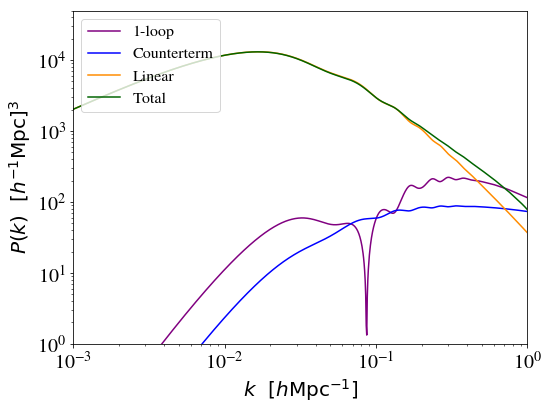

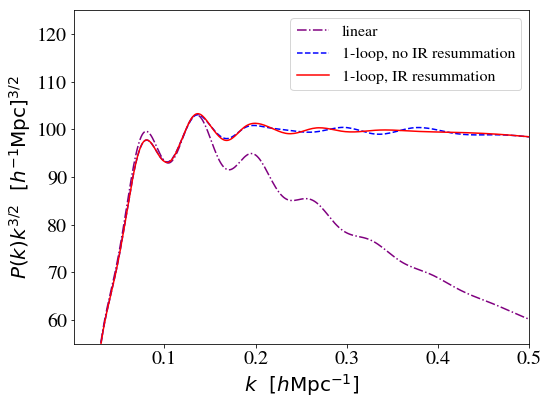

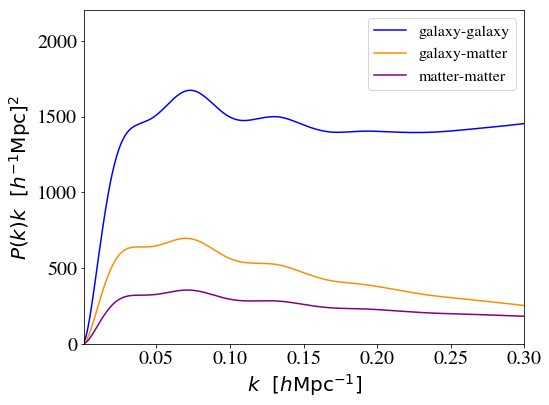

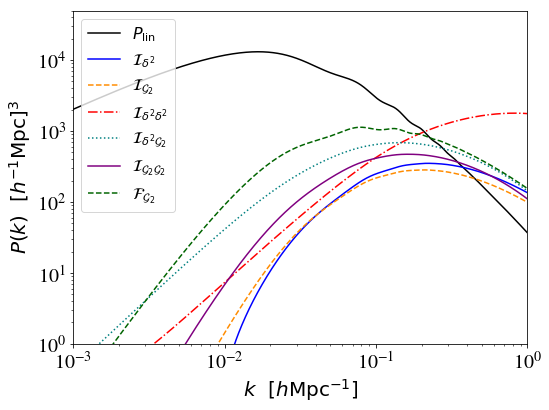

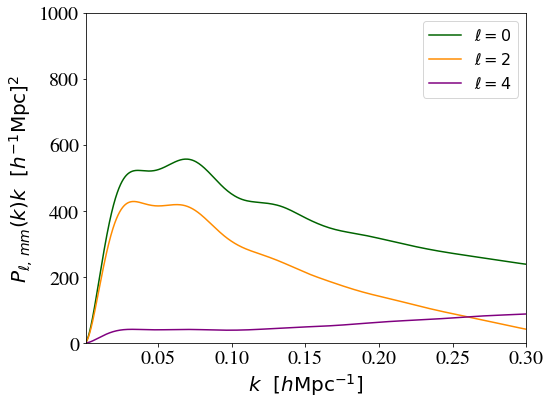

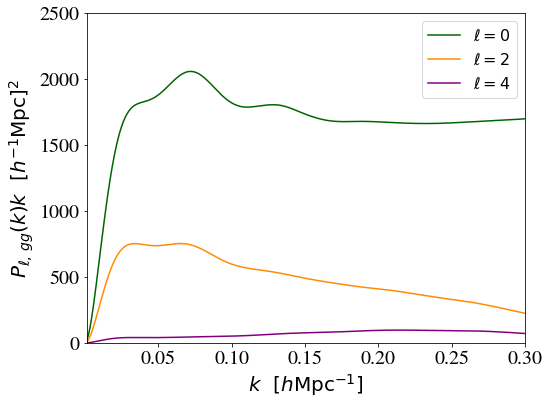

In [4]:
#############################################
#
# extract spectra and plot them
#
#############################################

h = M.h()
fz = M.scale_independent_growth_factor_f(z_pk)
kvec = np.logspace(-3,np.log10(3),1000) # array of kvec in h/Mpc
twopi = 2.*math.pi
khvec = kvec*h # array of kvec in 1/Mpc
#
# Create figures
#
fig_Pk, ax_Pk = plt.subplots()
fig_Pkir, ax_Pkir = plt.subplots()
fig_Pkgg, ax_Pkgg = plt.subplots()
fig_Pkgm, ax_Pkgm = plt.subplots()
fig_Pkmz, ax_Pkmz = plt.subplots()
fig_Pkgz, ax_Pkgz = plt.subplots()

legarray = []
pk_lin = []
pk_loop = []
pk_tree = []
pk_full = []
pk_full_ir = []
pk_ctr = []
pk_gg = []
pk_gm = []
pk_m0 = []
pk_m2 = []
pk_m4 = []
pk_g0 = []
pk_g2 = []
pk_g4 = []
pk_Id2 = []
pk_IG2 = []
pk_Id2d2 = []
pk_Id2G2 = []
pk_IG2G2 = []
pk_FG2 = []


b1 = 2.0
cs = 1. # in units [Mpc/h]^2
b2 = -1.
bG2 = 0.1
bGamma3 = -0.1
Pshot = 5e3 # in units [Mpc/h]^3
cs0 = 5. # in units [Mpc/h]^2
cs2 = 25. # in units [Mpc/h]^2
cs4 = 1. # in units [Mpc/h]^2
b4 = 250. # in units [Mpc/h]^4

for kh in khvec:
    pk_tree.append(M.pk(kh,z_pk)[14]*h**3.)
    pk_loop.append(M.pk(kh,z_pk)[0]*h**3.)
    pk_ctr.append(2*M.pk(kh,z_pk)[10]*h)
    # basic real space matter power spectrum without IR resummation below
    pk_full.append((M.pk(kh,z_pk)[0]+M.pk(kh,z_pk)[14]+2*cs*M.pk(kh,z_pk)[10]/h**2.)*h**3.)
    # linear theory matter power spectrum below
    pk_lin.append(M1.pk_lin(kh,z_pk)*h**3.)
    # real space matter power spectrum below
    pk_full_ir.append((M1.pk(kh,z_pk)[0]+M1.pk(kh,z_pk)[14]+2*cs*M1.pk(kh,z_pk)[10]/h**2.)*h**3.)
    # real space galaxy-galaxy power spectrum below
    pk_gg.append((b1**2.*M1.pk(kh, z_pk)[14] 
                  + b1**2.*M1.pk(kh, z_pk)[0] 
                  + 2.*cs0*b1**2.*M1.pk(kh, z_pk)[10]/h**2. 
                  + b1*b2*M1.pk(kh, z_pk)[2]
                  + 0.25*b2**2.*M1.pk(kh, z_pk)[1] 
                  + 2.*b1*bG2*M1.pk(kh, z_pk)[3] 
                  + b1*(2.*bG2 + 0.8*bGamma3)*M1.pk(kh, z_pk)[6] 
                  + bG2**2.*M1.pk(kh, z_pk)[5] 
                  + b2*bG2*M1.pk(kh, z_pk)[4])*h**3. + Pshot) 
    # real space galaxy-matter power spectrum below
    pk_gm.append((b1*M1.pk(kh, z_pk)[14] 
                  + b1*M1.pk(kh, z_pk)[0] 
                  + 2.*cs*b1**2.*M1.pk(kh, z_pk)[10]/h**2. 
                  + (b2/2)*M1.pk(kh, z_pk)[2]
                  + bG2*M1.pk(kh, z_pk)[3])*h**3.) 
    # separate contributions into the galaxy-galaxy power spectrum
    pk_Id2.append((M1.pk(kh, z_pk)[2])*h**3.) 
    pk_IG2.append((M1.pk(kh, z_pk)[3])*h**3.) 
    pk_Id2d2.append((M1.pk(kh, z_pk)[1])*h**3.) 
    pk_IG2G2.append((M1.pk(kh, z_pk)[5])*h**3.) 
    pk_Id2G2.append((M1.pk(kh, z_pk)[4])*h**3.) 
    pk_FG2.append((M1.pk(kh, z_pk)[6])*h**3.) 
    # dark matter redsfhit space monopole below
    pk_m0.append((M1.pk(kh, z_pk)[15] 
                  +M1.pk(kh, z_pk)[21]
                  +M1.pk(kh, z_pk)[16] 
                  +M1.pk(kh, z_pk)[22] 
                  +M1.pk(kh, z_pk)[17] 
                  +M1.pk(kh, z_pk)[23] 
                  + 2.*cs0*M1.pk(kh, z_pk)[11]/h**2.)*h**3.) 
    # dark matter redsfhit space quadrupole below
    pk_m2.append((M1.pk(kh, z_pk)[18] 
                  +M1.pk(kh, z_pk)[24]
                  +M1.pk(kh, z_pk)[19] 
                  +M1.pk(kh, z_pk)[25] 
                  +M1.pk(kh, z_pk)[26]  
                  +2.*cs2*M1.pk(kh, z_pk)[12]/h**2.)*h**3.)
    # dark matter redsfhit space hexadecapole below
    pk_m4.append((M1.pk(kh, z_pk)[20] 
                  +M1.pk(kh, z_pk)[27]
                  +M1.pk(kh, z_pk)[28] 
                  +M1.pk(kh, z_pk)[29] 
                  +2.*cs4*M1.pk(kh, z_pk)[13]/h**2.)*h**3.) 
     # galaxy redsfhit space monopole below
    pk_g0.append((M1.pk(kh, z_pk)[15] 
                  +M1.pk(kh, z_pk)[21]
                  + b1*M1.pk(kh, z_pk)[16] 
                  + b1*M1.pk(kh, z_pk)[22] 
                  + b1**2.*M1.pk(kh, z_pk)[17] 
                  + b1**2.*M1.pk(kh, z_pk)[23] 
                  + 0.25*b2**2.*M1.pk(kh, z_pk)[1] 
                  + b1*b2*M1.pk(kh, z_pk)[30]
                  + b2*M1.pk(kh, z_pk)[31] 
                  + b1*bG2*M1.pk(kh, z_pk)[32]
                  + bG2*M1.pk(kh, z_pk)[33]
                  + b2*bG2*M1.pk(kh, z_pk)[4]
                  + bG2**2.*M1.pk(kh, z_pk)[5] 
                  + 2.*cs0*b1**2.*M1.pk(kh, z_pk)[11]/h**2. 
                  + (2.*bG2+0.8*bGamma3)*(b1*M1.pk(kh, z_pk)[7]
                                                   +M1.pk(kh, z_pk)[8]))*h**3.
                  + Pshot 
                  + fz**2.*b4*kh**2.*(fz**2./9. + 2.*fz*b1/7. 
                                          + b1**2./5)*(35./8.)*M1.pk(kh, z_pk)[13]*h)
    # galaxy redsfhit space quadrupole below
    pk_g2.append((M1.pk(kh, z_pk)[18] 
                  +M1.pk(kh, z_pk)[24]
                  +b1*M1.pk(kh, z_pk)[19] 
                  +b1*M1.pk(kh, z_pk)[25] 
                  +b1**2.*M1.pk(kh, z_pk)[26] 
                  +b1*b2*M1.pk(kh, z_pk)[34]
                  +b2*M1.pk(kh, z_pk)[35] 
                  +b1*bG2*M1.pk(kh, z_pk)[36]
                  +bG2*M1.pk(kh, z_pk)[37]
                  +2.*cs2*M1.pk(kh, z_pk)[12]/h**2. 
                  +(2.*bG2+0.8*bGamma3)*M1.pk(kh, z_pk)[9])*h**3. 
                  +fz**2.*b4*kh**2.*((fz**2.*70. 
                                      + 165.*fz*b1
                                      +99.*b1**2.)*4./693.)*(35./8.)*M1.pk(kh, z_pk)[13]*h)
    # galaxy redsfhit space hexadecapole below
    pk_g4.append((M1.pk(kh, z_pk)[20] 
                  +M1.pk(kh, z_pk)[27]
                  +b1*M1.pk(kh, z_pk)[28] 
                  +b1**2.*M1.pk(kh, z_pk)[29] 
                  +b2*M1.pk(kh, z_pk)[38] 
                  +bG2*M1.pk(kh, z_pk)[39] 
                  +2.*cs4*M1.pk(kh, z_pk)[13]/h**2.)*h**3.
                  +fz**2.*b4*kh**2.*((fz**2.*210. 
                                      + 390.*fz*b1
                                      +143.*b1**2.)*8./5005.)*(35./8.)*M1.pk(kh, z_pk)[13]*h)

    
    
    
ax_Pk.loglog(kvec,np.array(np.abs(pk_loop)),color='purple',linestyle='-',label='1-loop')
ax_Pk.loglog(kvec,np.array(np.abs(pk_ctr)),color='b',linestyle='-',label='Counterterm')
ax_Pk.loglog(kvec,np.array(pk_tree),color='darkorange',linestyle='-',label='Linear')
ax_Pk.loglog(kvec,np.array(pk_full),color='darkgreen',linestyle='-',label='Total')

ax_Pkir.plot(kvec,np.array(pk_lin)*kvec**1.5,color='purple',linestyle='-.',label='linear')
ax_Pkir.plot(kvec,np.array(pk_full)*kvec**1.5,color='b',linestyle='--',label='1-loop, no IR resummation')
ax_Pkir.plot(kvec,np.array(pk_full_ir)*kvec**1.5,color='r',linestyle='-',label='1-loop, IR resummation')

ax_Pkgg.plot(kvec,np.array(pk_gg)*kvec,color='b',linestyle='-',label='galaxy-galaxy')
ax_Pkgg.plot(kvec,np.array(pk_gm)*kvec,color='darkorange',linestyle='-',label='galaxy-matter')
ax_Pkgg.plot(kvec,np.array(pk_full_ir)*kvec,color='purple',linestyle='-',label='matter-matter')

ax_Pkgm.loglog(kvec,np.array(np.abs(pk_lin)),color='k',linestyle='-',label=r'$P_{\rm lin}$')
ax_Pkgm.loglog(kvec,np.array(np.abs(pk_Id2)),color='b',linestyle='-',label=r'${\cal I}_{\delta^2}$')
ax_Pkgm.loglog(kvec,np.array(np.abs(pk_IG2)),color='darkorange',linestyle='--',label=r'${\cal I}_{{\cal G}_2}$')
ax_Pkgm.loglog(kvec,np.array(np.abs(pk_Id2d2)),color='r',linestyle='-.',label=r'${\cal I}_{\delta^2\delta^2}$')
ax_Pkgm.loglog(kvec,np.array(np.abs(pk_Id2G2)),color='teal',linestyle=':',label=r'${\cal I}_{\delta^2{\cal G}_2}$')
ax_Pkgm.loglog(kvec,np.array(np.abs(pk_IG2G2)),color='purple',linestyle='-',label=r'${\cal I}_{{\cal G}_2{\cal G}_2}$')
ax_Pkgm.loglog(kvec,np.array(np.abs(pk_FG2)),color='darkgreen',linestyle='--',label=r'${\cal F}_{{\cal G}_2}$')

ax_Pkmz.plot(kvec,np.array(pk_m0)*kvec,color='darkgreen',linestyle='-',label=r'$\ell = 0$')
ax_Pkmz.plot(kvec,np.array(pk_m2)*kvec,color='darkorange',linestyle='-',label=r'$\ell = 2$')
ax_Pkmz.plot(kvec,np.array(pk_m4)*kvec,color='purple',linestyle='-',label=r'$\ell = 4$')

ax_Pkgz.plot(kvec,np.array(pk_g0)*kvec,color='darkgreen',linestyle='-',label=r'$\ell = 0$')
ax_Pkgz.plot(kvec,np.array(pk_g2)*kvec,color='darkorange',linestyle='-',label=r'$\ell = 2$')
ax_Pkgz.plot(kvec,np.array(pk_g4)*kvec,color='purple',linestyle='-',label=r'$\ell = 4$')


# output of P(k) figures
ax_Pk.set_xlim([1.e-3,1])
ax_Pk.set_ylim([1,5e4])
ax_Pk.set_xlabel(r'$k \,\,\,\, [h\mathrm{Mpc}^{-1}]$')
ax_Pk.set_ylabel(r'$P(k)\,\,\,\, [h^{-1}\mathrm{Mpc}]^3$')
ax_Pk.legend(fontsize='16',ncol=1,loc='upper left')
fig_Pk.savefig('real_Pk.pdf')
fig_Pk.tight_layout()

ax_Pkir.set_xlim([1.e-3,0.5])
ax_Pkir.set_ylim([55,125])
ax_Pkir.set_xlabel(r'$k \,\,\,\, [h\mathrm{Mpc}^{-1}]$')
ax_Pkir.set_ylabel(r'$P(k)k^{3/2}\,\,\,\, [h^{-1}\mathrm{Mpc}]^{3/2}$')
ax_Pkir.legend(fontsize='16',ncol=1,loc='upper right')
fig_Pkir.savefig('real_Pk_IR.pdf')
fig_Pkir.tight_layout()

ax_Pkgg.set_xlim([1.e-3,0.3])
ax_Pkgg.set_ylim([1,2200])
ax_Pkgg.set_xlabel(r'$k \,\,\,\, [h\mathrm{Mpc}^{-1}]$')
ax_Pkgg.set_ylabel(r'$P(k)k\,\,\,\, [h^{-1}\mathrm{Mpc}]^{2}$')
ax_Pkgg.legend(fontsize='16',ncol=1,loc='upper right')
fig_Pkgg.savefig('real_Pkgg.pdf')
fig_Pkgg.tight_layout()

ax_Pkgm.set_xlim([1.e-3,1])
ax_Pkgm.set_ylim([1,5e4])
ax_Pkgm.set_xlabel(r'$k \,\,\,\, [h\mathrm{Mpc}^{-1}]$')
ax_Pkgm.set_ylabel(r'$P(k)\,\,\,\, [h^{-1}\mathrm{Mpc}]^3$')
ax_Pkgm.legend(fontsize='16',ncol=1,loc='upper left')
fig_Pkgm.savefig('real_Pkgg_breakdown.pdf')
fig_Pkgm.tight_layout()

ax_Pkmz.set_xlim([1.e-3,0.3])
ax_Pkmz.set_ylim([1,1000])
ax_Pkmz.set_xlabel(r'$k \,\,\,\, [h\mathrm{Mpc}^{-1}]$')
ax_Pkmz.set_ylabel(r'$P_{\ell,\,mm}(k)k\,\,\,\, [h^{-1}\mathrm{Mpc}]^{2}$')
ax_Pkmz.legend(fontsize='16',ncol=1,loc='upper right')
fig_Pkmz.savefig('rsd_Pkmm.pdf')
fig_Pkmz.tight_layout()


ax_Pkgz.set_xlim([1.e-3,0.3])
ax_Pkgz.set_ylim([1,2500])
ax_Pkgz.set_xlabel(r'$k \,\,\,\, [h\mathrm{Mpc}^{-1}]$')
ax_Pkgz.set_ylabel(r'$P_{\ell,\,gg}(k)k\,\,\,\, [h^{-1}\mathrm{Mpc}]^{2}$')
ax_Pkgz.legend(fontsize='16',ncol=1,loc='upper right')
fig_Pkgz.savefig('rsd_Pkgg.pdf')
fig_Pkgz.tight_layout()




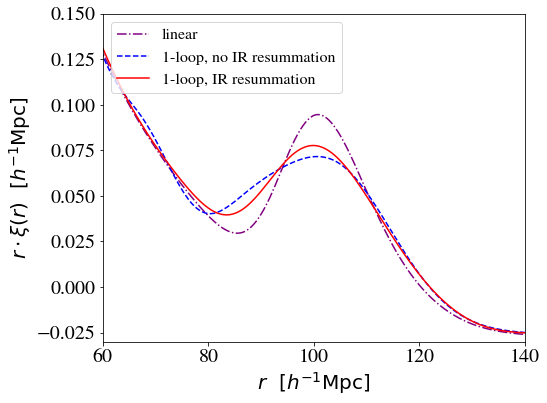

In [5]:
def J0(r,nu):
    return -1.*np.sin(pi*nu/2.)*r**(-3.-1.*nu)*special.gamma(2+nu)/(2.*pi**2.)
Nmax = 256
bk = -1.1001
kmax = 100.
k0 = 1.e-4
rtab = np.zeros(Nmax)
rmin = 0.01
rmax = 1000.
Delta = log(kmax/k0) / (Nmax - 1)
Delta_r = log(rmax/rmin) / (Nmax - 1)

Pdiscrin0 = np.zeros(Nmax);
Pdiscrin1 = np.zeros(Nmax);
Pdiscrin2 = np.zeros(Nmax);
jsNm = np.arange(-Nmax/2,Nmax/2+1,1)
etam = bk + 2*1j*pi*(jsNm)/Nmax/Delta
kbins3 = np.zeros(Nmax);

for i in range(Nmax):
    kbins3[i] = k0 * exp(Delta * i)
    kinloop1 = kbins3[i] * h
    rtab[i] = rmin * exp(Delta_r * i)
    theory0 = (M1.pk_lin(kinloop1,z_pk))*h**3.
    theory1 = (M.pk(kinloop1,z_pk)[0]+M.pk(kinloop1,z_pk)[14]+2*cs*M.pk(kinloop1,z_pk)[10]/h**2.)*h**3.
    theory2 = (M1.pk(kinloop1,z_pk)[0]+M1.pk(kinloop1,z_pk)[14]+2*cs*M1.pk(kinloop1,z_pk)[10]/h**2.)*h**3.
    Pdiscrin0[i] = theory0 * exp( -1.*(kinloop1/4.)**4. -1.*bk*i*Delta)
    Pdiscrin1[i] = theory1 * exp( -1.*(kinloop1/4.)**4. -1.*bk*i*Delta)
    Pdiscrin2[i] = theory2 * exp( -1.*(kinloop1/4.)**4. -1.*bk*i*Delta)

cm0 = np.fft.fft(Pdiscrin0)/ Nmax
cm1 = np.fft.fft(Pdiscrin1)/ Nmax
cm2 = np.fft.fft(Pdiscrin2)/ Nmax
cmsym0 = np.zeros(Nmax+1,dtype=np.complex_)
cmsym1 = np.zeros(Nmax+1,dtype=np.complex_)
cmsym2 = np.zeros(Nmax+1,dtype=np.complex_)

for i in range(Nmax+1):
    if (i+2 - Nmax/2) < 1:
        cmsym0[i] =  k0**(-etam[i])*np.conjugate(cm0[-i + Nmax/2])
        cmsym1[i] =  k0**(-etam[i])*np.conjugate(cm1[-i + Nmax/2])
        cmsym2[i] =  k0**(-etam[i])*np.conjugate(cm2[-i + Nmax/2])
    else:
        cmsym0[i] = k0**(-etam[i])* cm0[i - Nmax/2]
        cmsym1[i] = k0**(-etam[i])* cm1[i - Nmax/2]
        cmsym2[i] = k0**(-etam[i])* cm2[i - Nmax/2]
        
cmsym0[-1] = cmsym0[-1] / 2
cmsym0[0] = cmsym0[0] / 2
cmsym1[-1] = cmsym1[-1] / 2
cmsym1[0] = cmsym1[0] / 2
cmsym2[-1] = cmsym2[-1] / 2
cmsym2[0] = cmsym2[0] / 2

xi0 = np.zeros(Nmax)
xi1 = np.zeros(Nmax)
xi2 = np.zeros(Nmax)

for i in range(Nmax):
    for j in range(Nmax + 1):
        xi0[i] = xi0[i] + np.real(cmsym0[j]*J0(rtab[i],etam[j]))
        xi1[i] = xi1[i] + np.real(cmsym1[j]*J0(rtab[i],etam[j]))
        xi2[i] = xi2[i] + np.real(cmsym2[j]*J0(rtab[i],etam[j]))

xi0inter = interpolate.InterpolatedUnivariateSpline(rtab,xi0)
xi1inter = interpolate.InterpolatedUnivariateSpline(rtab,xi1)
xi2inter = interpolate.InterpolatedUnivariateSpline(rtab,xi2)

rvec = np.logspace(0.,np.log10(3),1000) # array of rvec in Mpc/h
rvec = 10**rvec
# xi_lin = np.zeros(len(rvec))
# xi_loop = np.zeros(len(rvec))
# xi_loopir = np.zeros(len(rvec))
# for i in range(len(rvec)):
#     xi_lin[i]=xi0inter(rvec[i])*rvec[i]
#     xi_loop[i]=xi1inter(rvec[i])*rvec[i]
#     xi_loopir[i]=xi2inter(rvec[i])*rvec[i]
    
xi_lin = []
xi_loop =[]
xi_loopir =[]
for r in rvec:
    xi_lin.append(xi0inter(r)*r)
    xi_loop.append(xi1inter(r)*r)
    xi_loopir.append(xi2inter(r)*r)

fig_xi, ax_xi = plt.subplots()
ax_xi.plot(rvec,xi_lin,color='purple',linestyle='-.',label='linear')
ax_xi.plot(rvec,xi_loop,color='b',linestyle='--',label='1-loop, no IR resummation')
ax_xi.plot(rvec,xi_loopir,color='red',linestyle='-',label='1-loop, IR resummation')
ax_xi.set_xlim([60.,140.])
ax_xi.set_ylim([-0.03,0.15])
ax_xi.set_xlabel(r'$r \,\,\,\, [h^{-1}\mathrm{Mpc}]$')
ax_xi.set_ylabel(r'$r\cdot \xi(r)\,\,\,\, [h^{-1}\mathrm{Mpc}]$')
ax_xi.legend(fontsize='16',ncol=1,loc='upper left')
fig_xi.tight_layout()
fig_xi.savefig('real_Xi.pdf')

In [6]:
#############################################
#
# extract lensed TT and PhiPhi CMB spectra and plot them
#
#############################################

M2 = Class()
M2.set(common_settings)
M2.set({'output':'mPk,lCl,tCl',
        'lensing':'Yes',
        'l_switch_limber':9,
        'non linear':'SPT',
        'IR resummation':'No',
        'Bias tracers':'No',
        'RSD':'No'
       })
M2.compute()

M3 = Class()
M3.set(common_settings)
M3.set({'output':'mPk,lCl,tCl',
        'lensing':'Yes',
        'l_switch_limber':9,
        'non linear':'none'
       })
M3.compute()
M4 = Class()
M4.set(common_settings)
M4.set({'output':'mPk,lCl,tCl',
        'lensing':'Yes',
        'l_switch_limber':9,
        'non linear':'Halofit'
       })
M4.compute()

In [7]:
# ll = {}
# clM = {}
# clTT = {}
# clTTlin = {}
cl = M2.lensed_cl(2500)
ll = cl['ell'][2:]
clTT = cl['tt'][2:]
clPP = cl['pp'][2:]
cllin = M3.lensed_cl(2500)
clTTlin = cllin['tt'][2:]
clPPlin = cllin['pp'][2:]
clhal = M4.lensed_cl(2500)
clTThal = clhal['tt'][2:]
clPPhal = clhal['pp'][2:]

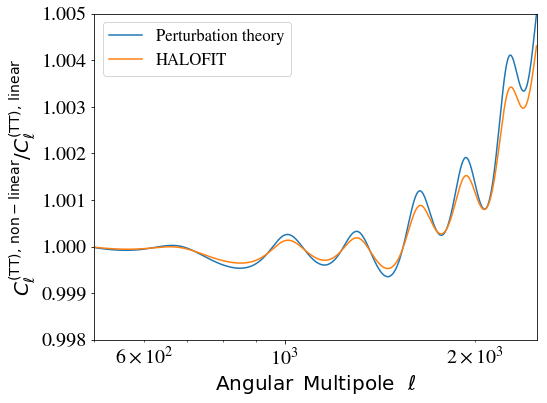

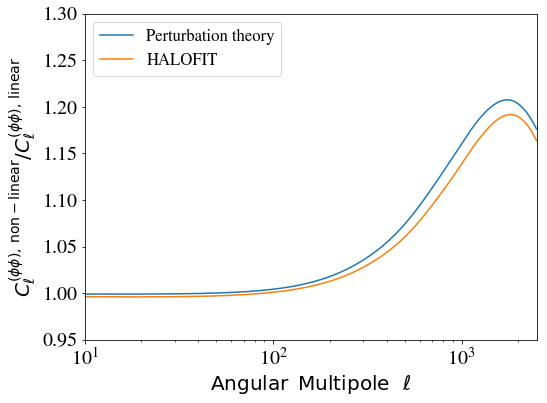

In [8]:
fig_TT, ax_TT = plt.subplots()
ax_TT.semilogx(ll,clTT/clTTlin,linestyle='-',label=r'Perturbation theory')
ax_TT.semilogx(ll,clTThal/clTTlin,linestyle='-',label=r'HALOFIT')
ax_TT.set_xlim([500,2500])
ax_TT.set_ylim([0.998,1.005])
ax_TT.set_xlabel(r'$\mathrm{Angular\,\,\,Multipole} \,\,\,\,  \ell$')
ax_TT.set_ylabel(r'$C_\ell^\mathrm{(TT),\,{\rm non-linear}}/C_\ell^\mathrm{(TT),\,{\rm linear}}$')
ax_TT.legend(loc='upper left')
fig_TT.tight_layout()
fig_TT.savefig('ratios-cltt.pdf')

fig_PP, ax_PP = plt.subplots()
ax_PP.semilogx(ll,clPP/clPPlin,linestyle='-',label=r'Perturbation theory')
ax_PP.semilogx(ll,clPPhal/clPPlin,linestyle='-',label=r'HALOFIT')
ax_PP.set_xlim([10,2500])
ax_PP.set_ylim([0.95,1.3])
ax_PP.set_xlabel(r'$\mathrm{Angular\,\,\,Multipole} \,\,\,\,  \ell$')
ax_PP.set_ylabel(r'$C_\ell^{(\phi \phi),\,{\rm non-linear}}/C_\ell^{(\phi \phi),\,{\rm linear}}$')
ax_PP.legend(loc='upper left')
fig_PP.tight_layout()
fig_PP.savefig('ratios-clpp.pdf')